### [pollen-robotics/dtw](https://github.com/pollen-robotics/dtw?tab=readme-ov-file)

### Set up

In [1]:
!pip install dtw

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5301 sha256=6147245a6302cc236046c856ed35b509feeee7475171da461e068cbd73d7d0e2
  Stored in directory: c:\users\zombie\appdata\local\pip\cache\wheels\f9\51\54\b7f446e6d4f5be9a66066b59c5030731191260515737be4496
Successfully built dtw


### Example

In [2]:
import numpy as np

# We define two sequences x, y as numpy array
# where y is actually a sub-sequence from x
x = np.array([2, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
y = np.array([1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)

In [3]:
from dtw import dtw

# Here, we use L2 norm as the element comparison distance
l2_norm = lambda x, y: (x - y) ** 2

dist, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=l2_norm)

dist

2.0

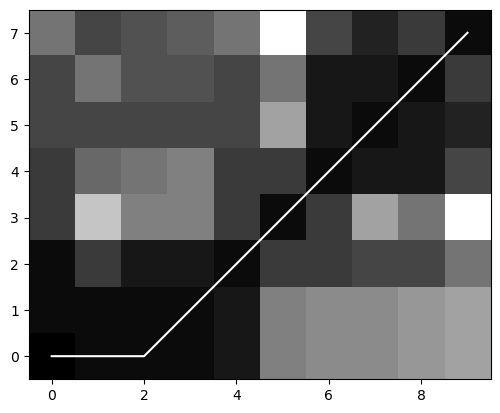

In [4]:
# You can also visualise the accumulated cost and the shortest path
import matplotlib.pyplot as plt

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()

## Test : sin & cos

### Function

In [5]:
def call_DTW(X, Y):
  l2_norm = lambda X, Y: (X - Y) ** 2
  dist, cost_matrix, acc_cost_matrix, path = dtw(X, Y, dist=l2_norm)
  return dist

### Data

In [6]:
x = np.arange(0, 4*np.pi, 0.1)   # start,stop,step
sin_y = np.sin(x)
cos_y = np.cos(x)

print("data length = ", len(x))

data length =  126


### Run

In [7]:
from dtw import dtw

dist = call_DTW(sin_y, cos_y)

print("原始距離 :", dist)
print("原始sin_y:", sin_y[0:5])
print("原始cos_y:", cos_y[0:5])

原始距離 : 12.666850243675945
原始sin_y: [0.         0.09983342 0.19866933 0.29552021 0.38941834]
原始cos_y: [1.         0.99500417 0.98006658 0.95533649 0.92106099]


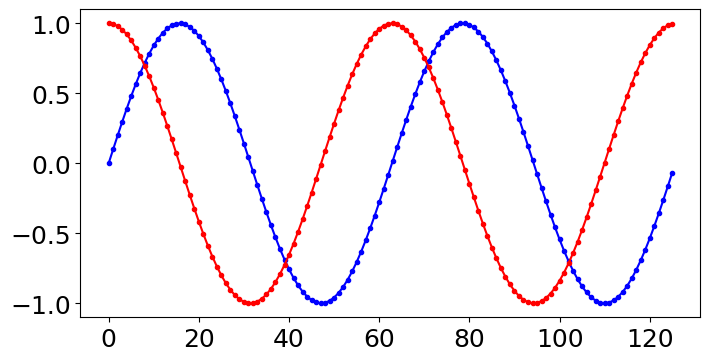

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(sin_y, color='blue', marker='o', markersize=3, linewidth=1.5)
ax.plot(cos_y, color='red', marker='o', markersize=3, linewidth=1.5)
ax.tick_params(axis="both", which="major", labelsize=18)

plt.show()

In [9]:
sin_y = np.sin(x)
cos_y = np.cos(x)

min_distance = dist
min_sin_y = sin_y

bias = 0

# 迭代循環sin_y元素，找最小距離
for i in range(len(sin_y)):
    sin_y = np.append(sin_y[1:],[sin_y[0]]) # 將[0]移至[last]
    dist = call_DTW(sin_y, cos_y)
    if dist < min_distance:
        min_distance = dist
        min_sin_y = sin_y
        bias = i+1

print("最小距離:", min_distance)
print("偏移修正:", bias)
print("修正sin_y:", min_sin_y[0:5])
print("原始cos_y:", cos_y[0:5])

最小距離: 0.04678360023470958
偏移修正: 16
修正sin_y: [0.9995736  0.99166481 0.97384763 0.94630009 0.90929743]
原始cos_y: [1.         0.99500417 0.98006658 0.95533649 0.92106099]


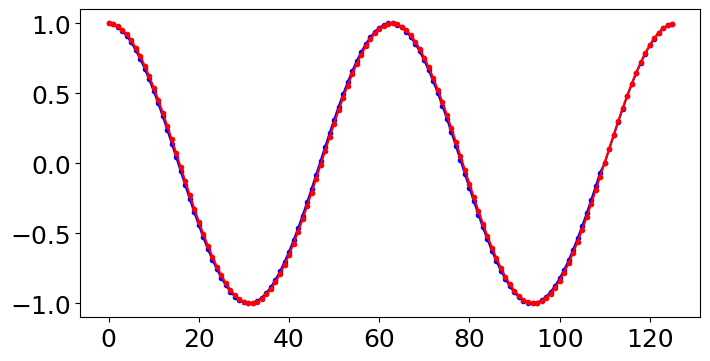

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(min_sin_y, color='blue', marker='o', markersize=3, linewidth=1.5)
ax.plot(cos_y, color='red', marker='o', markersize=3, linewidth=1.5)
ax.tick_params(axis="both", which="major", labelsize=18)

plt.show()